In [ ]:
# AISHA MUHAMMAD NAWAZ 20L-0921 BSCS 6E1 LAB 11 AI
#Cleaning Dataset A & saving it in a new file
import pandas as pd
excelData=pd.read_excel('/content/Bank_Customer_Churn_Prediction.xlsx') #Excel after read here because we are reading .xlsx file
df = pd.DataFrame(data=excelData)
df.isnull().sum()                   #Returns the number of columns that have null values (returns the number of missing values in the dataset.)
df.dropna(inplace=True)             #Removes the rows that contains NULL values
# Convert labels into 0 or 1 for Gender Column.
df['gender'] = df['gender'].replace(['Male', 'Female'], [0, 1])
# Implement One hot encoding on Country Column
pd=pd.get_dummies(data=df,columns=['country']) #Every unique country has new coloumn & its value is 1 or 0 in the row according to data of that row.
# Normalize the Dataset
df_min_max_scaled = pd.copy()  
# Coloumn Value = ( ( Coloumn Value - Min Value of that Coloumn ) / ( Max Value of that Coloumn - Min Value of that Coloumn )  )
df_min_max_scaled['customer_id'] = (df_min_max_scaled['customer_id'] - df_min_max_scaled['customer_id'].min()) / (df_min_max_scaled['customer_id'].max() - df_min_max_scaled['customer_id'].min())    
df=df_min_max_scaled
df
df.to_excel('DatasetA.xlsx')

Random starting weights.. 

Layer 1 weights: 

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]
 [-0.5910955   0.75623487 -0.94522481  0.34093502]
 [-0.1653904   0.11737966 -0.71922612 -0.60379702]
 [ 0.60148914  0.93652315 -0.37315164  0.38464523]
 [ 0.7527783   0.78921333 -0.82991158 -0.92189043]
 [-0.66033916  0.75628501 -0.80330633 -0.15778475]
 [ 0.91577906  0.06633057  0.38375423 -0.36896874]
 [ 0.37300186  0.66925134 -0.96342345  0.50028863]
 [ 0.97772218  0.49633131 -0.43911202  0.57855866]
 [-0.79354799 -0.10421295  0.81719101 -0.4127717 ]
 [-0.42444932 -0.73994286 -0.96126608  0.35767107]]

Layer 2 weights:

[[-0.57674377]
 [-0.46890668]
 [-0.01685368]
 [-0.89327491]]
New weights after training..

Layer 1 weights: 

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]
 [-0.59

<ipython-input-49-0eaf17c5f427>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + exp(-x))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

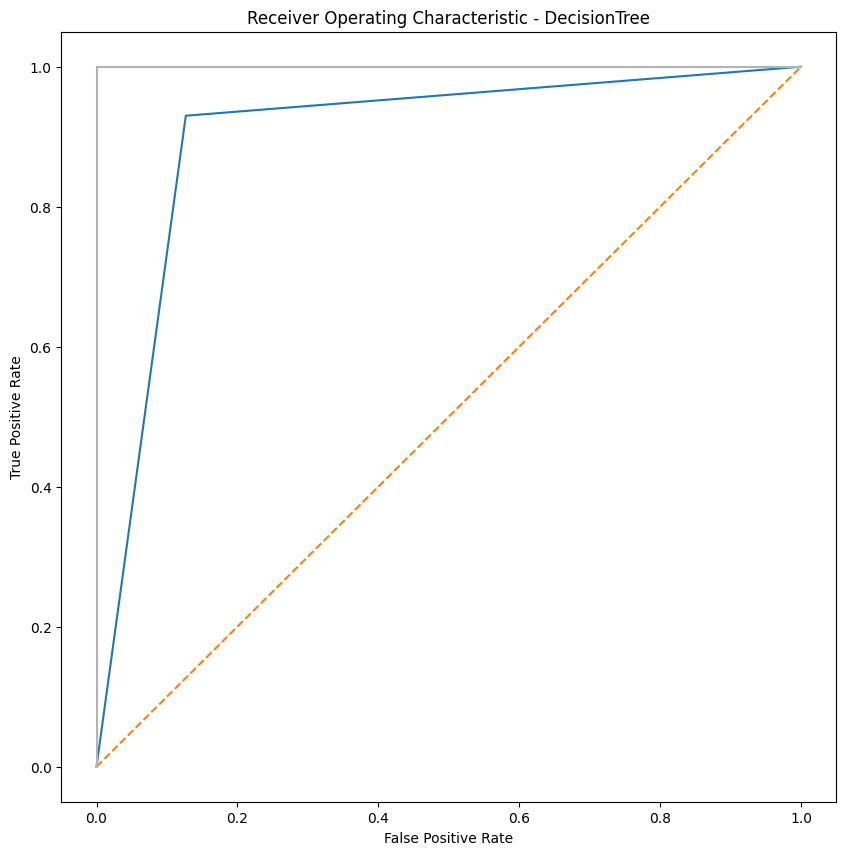

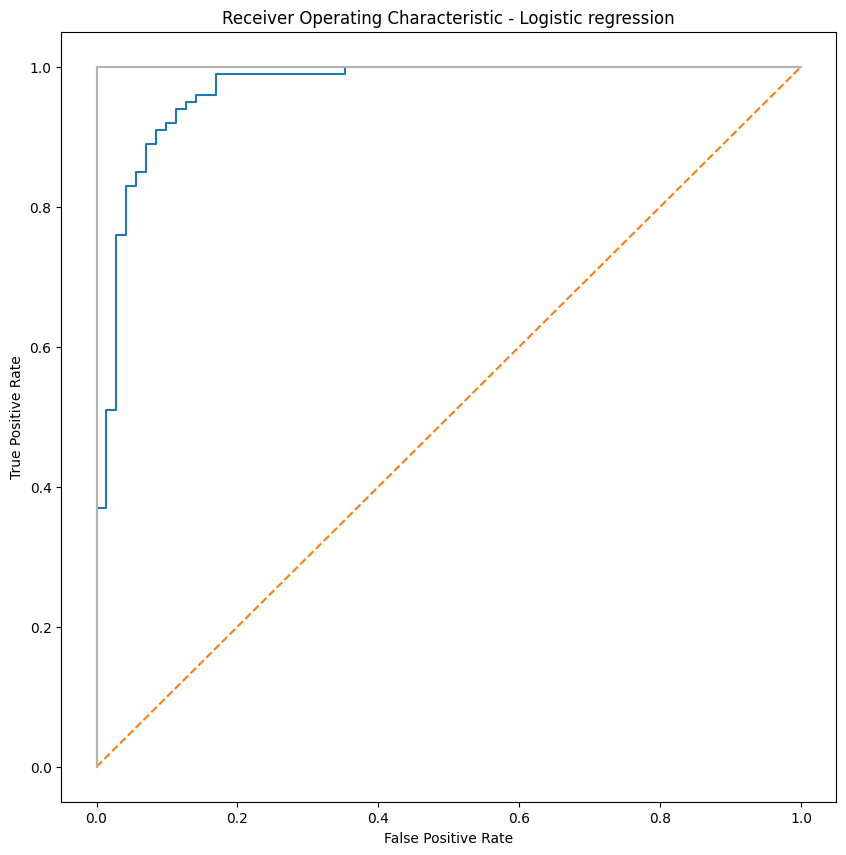

In [49]:
from re import X
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import exp, array, random, dot

class NeuronLayer():
    def __init__(self, neurons, inp):
        self.weights = 2 * random.random((inp, neurons)) - 1

class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2

    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    def trainNetwork(self, xInput, yOutput, epochs,learningRate=0.1):
        for _ in range(epochs):
            hi, oj = self.ForwardPass(xInput)

            oj_error = yOutput - oj
            oj_delta = oj_error.dot(self.__sigmoid_derivative(oj))

            hi_error = np.multiply(oj_delta,self.layer2.weights.T)
            hi_delta = np.multiply(hi_error,self.__sigmoid_derivative(hi))

            layer1Change = xInput.T.dot(hi_delta)
            layer2Change = hi.T.dot(oj_delta)

            # Updating the weights:
            self.layer1.weights =  self.layer1.weights + layer1Change
            self.layer2.weights =  self.layer2.weights + layer2Change


    def ForwardPass(self, inputs):        
        hi= self.__sigmoid(dot(inputs, self.layer1.weights))
        oj = self.__sigmoid(dot(hi, self.layer2.weights))
        return hi,oj
    def print_weights(self):
        print ("\nLayer 1 weights: \n")
        print (self.layer1.weights)
        print ("\nLayer 2 weights:\n")
        print (self.layer2.weights)

if __name__ == "__main__":
    random.seed(1)
    #Extracting Data Set A
    excelData=pd.read_excel('/content/DatasetA.xlsx') 
    df = pd.DataFrame(data=excelData)
 
    dfX=df.drop(['churn'],axis=1) #Inputs
    dfX=dfX.loc[:].values.tolist() #Converting to list form

    dfY=df['churn']                           # Output
    dfY=dfY.loc[:].values.tolist() #Converting to list form

    X_train, X_test, y_train, y_test = train_test_split(dfX,dfY,test_size=0.2, random_state=42) #Split arrays or matrices into random train and test subsets.
    X_train=np.array(X_train)
    y_train=np.array(y_train).T

    layer1 = NeuronLayer(4, 13)                      # Create layer 1 (4 neurons, each with 13 inputs)
    layer2 = NeuronLayer(1, 4)                       # Create layer 2 (a single neuron with 4 inputs)
    neural_network = NeuralNetwork(layer1, layer2)   # Combine the layers to create a neural network

    print ("Random starting weights.. ")
    neural_network.print_weights()

    # Train the neural network using the training set (1000 epochs)
    neural_network.trainNetwork(X_train, y_train, 1000)
    print ("New weights after training..")
    neural_network.print_weights()

    #Testing..
    hi,oj=neural_network.ForwardPass(X_test)
    print('Expected Output: ',y_test)
    print('Actual Output: ',oj)


    #Using Confusion Metric & Classification Report :
    from sklearn import datasets
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, confusion_matrix

    class_names=['Class 0','Class 1']
    # Creating DecisionTree model
    classifier_tree = DecisionTreeClassifier()

    # Training model and make predictions
    y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)

    # Creating a classification report
    print(classification_report(y_test, y_predict, target_names=class_names))

    # Creating a confusion matrix
    print(confusion_matrix(y_test, y_predict))


    #ROC CURVE
    from sklearn import datasets
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_curve, roc_auc_score
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    # Creating feature matrix and target vector
    dataset = datasets.load_breast_cancer()
    X = dataset.data
    y = dataset.target

    # Spliting into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # Creating classifier
    clf_tree = DecisionTreeClassifier(); clf_reg = LogisticRegression();

    # Training model
    clf_tree.fit(X_train, y_train); clf_reg.fit(X_train, y_train);

    # Getting predicted probabilities
    y_score1 = clf_tree.predict_proba(X_test)[:,1]
    y_score2 = clf_reg.predict_proba(X_test)[:,1]

    # Ploting Receiving Operating Characteristic Curve
    # Creating true and false positive rates
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
    false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
    print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
    print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

    # Ploting ROC curves
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - DecisionTree')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Logistic regression')
    plt.plot(false_positive_rate2, true_positive_rate2)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [5]:
from numpy import exp, array, random, dot


class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1


class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)

            # Calculate the error for layer 2 (The difference between the desired output
            # and the predicted output).
            layer2_error = training_set_outputs - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)

            # Calculate the error for layer 1 (By looking at the weights in layer 1,
            # we can determine by how much layer 1 contributed to the error in layer 2).
            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)

            # Calculate how much to adjust the weights by
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)

            # Adjust the weights.
            self.layer1.synaptic_weights += layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment

    # The neural network thinks.
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2

    # The neural network prints its weights
    def print_weights(self):
        print ("    Layer 1 (4 neurons, each with 3 inputs): ")
        print (self.layer1.synaptic_weights)
        print ("    Layer 2 (1 neuron, with 4 inputs):")
        print (self.layer2.synaptic_weights)

if __name__ == "__main__":

    #Seed the random number generator
    random.seed(1)

    # Create layer 1 (4 neurons, each with 3 inputs)
    layer1 = NeuronLayer(4, 3)

    # Create layer 2 (a single neuron with 4 inputs)
    layer2 = NeuronLayer(1, 4)

    # Combine the layers to create a neural network
    neural_network = NeuralNetwork(layer1, layer2)

    print ("Stage 1) Random starting synaptic weights: ")
    neural_network.print_weights()

    # The training set. We have 7 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [0, 1, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]])
    training_set_outputs = array([[0, 1, 1, 1, 1, 0, 0]]).T

    # Train the neural network using the training set.
    # Do it 60,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 60000)

    print ("Stage 2) New synaptic weights after training: ")
    neural_network.print_weights()

    # Test the neural network with a new situation.
    print ("Stage 3) Considering a new situation [1, 1, 0] -> ?: ")
    hidden_state, output = neural_network.think(array([1, 1, 0]))
    print (output)


Stage 1) Random starting synaptic weights: 
    Layer 1 (4 neurons, each with 3 inputs): 
[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
    Layer 2 (1 neuron, with 4 inputs):
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Stage 2) New synaptic weights after training: 
    Layer 1 (4 neurons, each with 3 inputs): 
[[ 0.3122465   4.57704063 -6.15329916 -8.75834924]
 [ 0.19676933 -8.74975548 -6.1638187   4.40720501]
 [-0.03327074 -0.58272995  0.08319184 -0.39787635]]
    Layer 2 (1 neuron, with 4 inputs):
[[ -8.18850925]
 [ 10.13210706]
 [-21.33532796]
 [  9.90935111]]
Stage 3) Considering a new situation [1, 1, 0] -> ?: 
[0.0078876]
